## Business Understanding
This project is based on an example of ABG Motors, a successful Japanese car manufacturer, considering entry into the Indian market,seeks to confirm profitability similarities with Japan. The company sees India as a key opportunity to expand its sales; it has been tracking the Indian market for over a few years. ABG Motors believes that the Indian market is quite similar to the Japanese market where the company currently operates. Before entering the new market, the company wants to be sure that the whole process will be profitable for them. Hence, you are given the task of ensuring the forecast of a minimum of 12,000 car sells over the sample data in one year. Since you can’t analyse the entire Indian and Chinese markets, the company has asked you to analyse sample data from two major cities, one from each country, to understand the sales pattern; which can be named as “Indian Dataset” & “Japanese Dataset”.

The following results are expected at the end :
1. A classification model over the Japanese data set estimates if an individual is likely to buy a new phone based on the provided attributes.
2. Based on the learning in the module, justification should be provided for all the decisions made while building the model.
3. Businessinterpretation of the coefficients obtained for variablesin the model.
4. Metrics associated with the validation, performance, and evaluation of the model
5. Count of potential customers in the Indian market based on the model
6. Also,show some visualisation using Tableau to understand both country’s market trends better.


In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [106]:
df_IN_Data=pd.read_csv("E:\\Internshala\\Project\\Modified data\\IN_Data.csv")
df_IN_Data.head()

,ID,CURR_AGE,AGE_CAR,INCOME,Age_Segment
0,20710B05XL,54,437,1425390,3
1,89602T51HX,47,388,1678954,3
2,70190Z52IP,60,700,931624,4
3,25623V15MU,55,700,1106320,4
4,36230I68CE,32,155,748465,1


In [107]:
df_JPN_Data=pd.read_csv("E:\\Internshala\\Project\\Modified data\\JPN_Data.csv")
df_JPN_Data.head()

,ID,CURR_AGE,AGE_CAR,INCOME,PURCHASE,Age_Segment
0,00001Q15YJ,50,439,244939.20,0,3
1,00003I71CQ,35,283,59198.70,0,2
2,00003N47FS,59,390,276532.85,1,3
3,00005H41DE,43,475,322115.20,0,3
4,00007E17UM,39,497,388147.65,1,3


In [108]:
##EDA
df_IN_Data.describe()

,CURR_AGE,AGE_CAR,INCOME,Age_Segment
count,70000.000000,70000.000000,7.000000e+04,70000.000000
mean,44.995314,367.326057,1.148679e+06,2.401129
std,11.822122,241.999792,3.994505e+05,1.080336
min,25.000000,1.000000,3.000330e+05,1.000000
25%,35.000000,189.000000,8.568238e+05,1.000000
50%,45.000000,340.000000,1.125152e+06,2.000000
75%,55.000000,473.000000,1.438676e+06,3.000000
max,65.000000,1020.000000,1.999989e+06,4.000000


In [109]:
df_JPN_Data.describe()

,CURR_AGE,AGE_CAR,INCOME,PURCHASE,Age_Segment
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000
mean,44.99745,359.080250,197669.383024,0.575775,2.400625
std,11.82008,203.063724,96310.093260,0.494231,0.912604
min,25.00000,1.000000,38548.950000,0.000000,1.000000
25%,35.00000,235.000000,120871.300000,0.000000,2.000000
50%,45.00000,331.000000,185711.350000,1.000000,2.000000
75%,55.00000,444.000000,255343.412500,1.000000,3.000000
max,65.00000,1020.000000,439984.050000,1.000000,4.000000


In [110]:
df_JPN_Data.drop(['ID', 'AGE_CAR'], axis=1, inplace=True)
df_JPN_Data.head()

,CURR_AGE,INCOME,PURCHASE,Age_Segment
0,50,244939.20,0,3
1,35,59198.70,0,2
2,59,276532.85,1,3
3,43,322115.20,0,3
4,39,388147.65,1,3


In [111]:
df_IN_Data.drop(['ID', 'AGE_CAR'], axis=1, inplace=True)
df_IN_Data.head()

,CURR_AGE,INCOME,Age_Segment
0,54,1425390,3
1,47,1678954,3
2,60,931624,4
3,55,1106320,4
4,32,748465,1


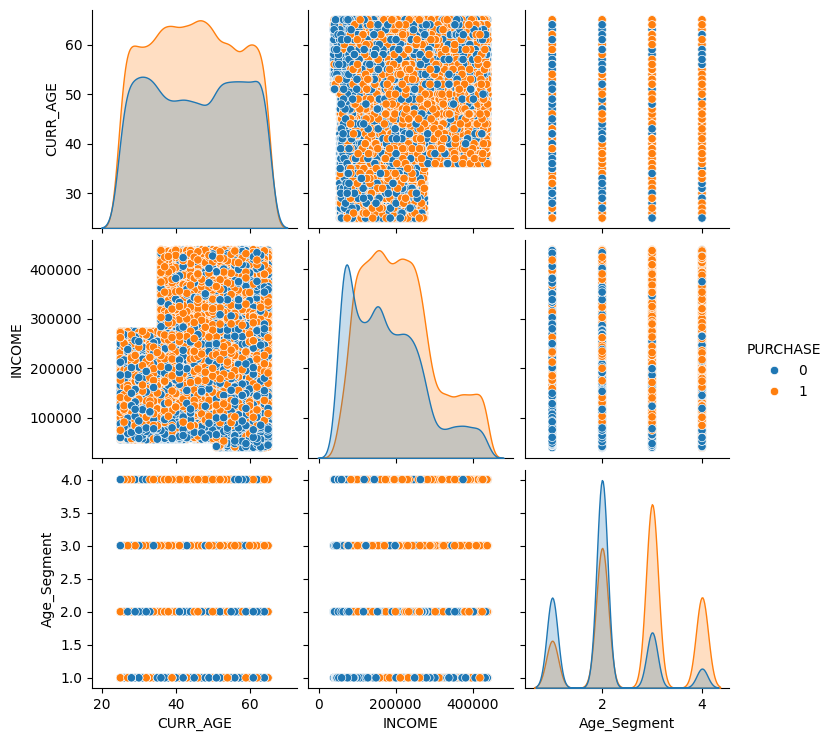

In [112]:
sns.pairplot(df_JPN_Data, hue='PURCHASE')
plt.show()

In [113]:
# Train test split
X=df_JPN_Data[['CURR_AGE', 'INCOME', 'Age_Segment']]
y=df_JPN_Data['PURCHASE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)

In [114]:
df=df_IN_Data[['CURR_AGE', 'INCOME', 'Age_Segment']]
df.head()

,CURR_AGE,INCOME,Age_Segment
0,54,1425390,3
1,47,1678954,3
2,60,931624,4
3,55,1106320,4
4,32,748465,1


In [115]:
## Modelling ## LogisticRegression
from sklearn.linear_model import LogisticRegression

##save the model
model1=LogisticRegression()
# Fit
model1.fit(X_train,y_train)

## Prediction
y_prediction_train=model1.predict(X_train)
y_prediction_test=model1.predict(X_test)

In [116]:
##Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy: ", accuracy_score(y_train, y_prediction_train))
print("Test accuracy: ", accuracy_score(y_test, y_prediction_test))


Train accuracy:  0.6759375
Test accuracy:  0.679875


In [117]:
## Final XGB model with n_estimators: 9
from xgboost import XGBClassifier
F_model_xgb=XGBClassifier(n_estimators=9)
F_model_xgb.fit(X_train,y_train)

## Prediction
y_prediction_train_fxgb=F_model_xgb.predict(X_train)
y_prediction_test_fxgb=F_model_xgb.predict(X_test)

print("Train accuracy: ", accuracy_score(y_train, y_prediction_train_fxgb))
print("Test accuracy: ", accuracy_score(y_test, y_prediction_test_fxgb))

Train accuracy:  0.70553125
Test accuracy:  0.692625


In [118]:
# Make predictions
predictions1 = model1.predict(df)

# (Optional) Add predictions to DataFrame
df_IN_Data['Predicted_PURCHASE_model1'] = predictions1

# Preview
print(df_IN_Data[['Predicted_PURCHASE_model1']])

       Predicted_PURCHASE_model1
0                              1
1                              1
2                              1
3                              1
4                              1
...                          ...
69995                          1
69996                          1
69997                          1
69998                          1
69999                          1

[70000 rows x 1 columns]


In [119]:
print("Total purchase_model1", df_IN_Data[['Predicted_PURCHASE_model1']].sum())

Total purchase_model1 Predicted_PURCHASE_model1    69332
dtype: int64


In [120]:
# Make predictions
predictions2 = F_model_xgb.predict(df)

# (Optional) Add predictions to DataFrame
df_IN_Data['Predicted_PURCHASE_F_model_xgb'] = predictions2

# Preview
print(df_IN_Data[['Predicted_PURCHASE_F_model_xgb']])

       Predicted_PURCHASE_F_model_xgb
0                                   1
1                                   1
2                                   1
3                                   1
4                                   0
...                               ...
69995                               1
69996                               1
69997                               0
69998                               1
69999                               1

[70000 rows x 1 columns]


In [121]:
print("Total purchase_XGB", df_IN_Data[['Predicted_PURCHASE_F_model_xgb']].sum())

Total purchase_XGB Predicted_PURCHASE_F_model_xgb    48100
dtype: int64


### Conclusion
As per the received data from 2 models the prediced sales counts are greater than 12000; 69332 with 68% accuracy and 48100 with accuracy rate ~70%. Hence the ABG Moters should enter the Indian market.  